In [10]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Generate and pair 1,500 coordinates

In [6]:
# Create a set of random latitude and longitude combinations.
# zip object packs each pair of lats and lngs having the same index in their respective array into a tuple
# this will create 1,500 tuples of paired lats and lngs, where each lat and lng can be accessed by the index of 0 and 1 (respectively)
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# Add the latitudes and longitudes to a list.
# This unzips the zipped tuple from above - this can only be done once before it's removed from computer's memory
coordinates = list(lat_lngs)

# Create a city list from randomly generated coordinates

In [8]:
from citipy import citipy

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

621

# Get city weather data

In [14]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [15]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | labutta
City not found. Skipping...
Processing Record 3 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | la romana
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | ketchikan
Processing Record 8 of Set 1 | samarai
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | norrtalje
Processing Record 11 of Set 1 | metro
Processing Record 12 of Set 1 | barrow
Processing Record 13 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 14 of Set 1 | high level
Processing Record 15 of Set 1 | ferkessedougou
Processing Record 16 of Set 1 | mandali
Processing Record 17 of Set 1 | bethel
Processing Record 18 of Set 1 | jamestown
Processing Record 19 of Set 1 | aix-en-provence
Processing Record 20 of Set 1 | ayr
Processing Record 21 of Set 1 | but

Processing Record 38 of Set 4 | geresk
City not found. Skipping...
Processing Record 39 of Set 4 | ust-kamchatsk
City not found. Skipping...
Processing Record 40 of Set 4 | shimoda
Processing Record 41 of Set 4 | la asuncion
Processing Record 42 of Set 4 | taman
Processing Record 43 of Set 4 | poya
Processing Record 44 of Set 4 | igarka
Processing Record 45 of Set 4 | chokurdakh
Processing Record 46 of Set 4 | mandalgovi
Processing Record 47 of Set 4 | san patricio
Processing Record 48 of Set 4 | kununurra
Processing Record 49 of Set 4 | khonuu
City not found. Skipping...
Processing Record 50 of Set 4 | yefimovskiy
City not found. Skipping...
Processing Record 1 of Set 5 | ust-kuyga
Processing Record 2 of Set 5 | sitka
Processing Record 3 of Set 5 | verkhoyansk
Processing Record 4 of Set 5 | karpogory
Processing Record 5 of Set 5 | oktyabrskiy
Processing Record 6 of Set 5 | rawah
Processing Record 7 of Set 5 | batagay
Processing Record 8 of Set 5 | port hawkesbury
Processing Record 9 o

Processing Record 26 of Set 8 | zaysan
Processing Record 27 of Set 8 | bogandinskiy
Processing Record 28 of Set 8 | tilichiki
Processing Record 29 of Set 8 | cidreira
Processing Record 30 of Set 8 | kruisfontein
Processing Record 31 of Set 8 | shar
Processing Record 32 of Set 8 | rungata
City not found. Skipping...
Processing Record 33 of Set 8 | labuhan
Processing Record 34 of Set 8 | pangai
Processing Record 35 of Set 8 | hambantota
Processing Record 36 of Set 8 | columbus
Processing Record 37 of Set 8 | savannah bight
Processing Record 38 of Set 8 | montepuez
Processing Record 39 of Set 8 | kavaratti
Processing Record 40 of Set 8 | constitucion
Processing Record 41 of Set 8 | kondagaon
Processing Record 42 of Set 8 | batagay-alyta
Processing Record 43 of Set 8 | sovetskiy
Processing Record 44 of Set 8 | abu samrah
Processing Record 45 of Set 8 | wanlaweyn
Processing Record 46 of Set 8 | honningsvag
Processing Record 47 of Set 8 | ahvaz
Processing Record 48 of Set 8 | olkhovka
Proces

Processing Record 15 of Set 12 | okhotsk
Processing Record 16 of Set 12 | soyo
Processing Record 17 of Set 12 | banjar
Processing Record 18 of Set 12 | haines junction
Processing Record 19 of Set 12 | lahat
Processing Record 20 of Set 12 | chas
Processing Record 21 of Set 12 | gaya
Processing Record 22 of Set 12 | cap malheureux
Processing Record 23 of Set 12 | morro bay
Processing Record 24 of Set 12 | port augusta
Processing Record 25 of Set 12 | noyabrsk
Processing Record 26 of Set 12 | kangaatsiaq
Processing Record 27 of Set 12 | alta floresta
Processing Record 28 of Set 12 | vyartsilya
Processing Record 29 of Set 12 | opuwo
Processing Record 30 of Set 12 | dawlatabad
Processing Record 31 of Set 12 | iquitos
Processing Record 32 of Set 12 | pisco
Processing Record 33 of Set 12 | asyut
Processing Record 34 of Set 12 | ternate
Processing Record 35 of Set 12 | henties bay
Processing Record 36 of Set 12 | tezu
Processing Record 37 of Set 12 | coos bay
Processing Record 38 of Set 12 | v

In [16]:
len(city_data)

571

# Create a DataFrame from city weather data

In [6]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

NameError: name 'city_data' is not defined

In [18]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bredasdorp,ZA,2022-02-01 05:08:38,-34.5322,20.0403,73.27,94,27,3.47
1,Albany,US,2022-02-01 05:06:49,42.6001,-73.9662,13.98,75,6,1.72
2,La Romana,DO,2022-02-01 05:08:39,18.4273,-68.9728,69.53,87,15,8.46
3,Yellowknife,CA,2022-02-01 05:08:26,62.4560,-114.3525,-12.59,86,79,8.01
4,Ketchikan,US,2022-02-01 05:04:49,55.3422,-131.6461,33.78,96,94,2.62
5,Samarai,PG,2022-02-01 05:08:40,-10.6167,150.6667,86.52,67,100,9.24
6,Ushuaia,AR,2022-02-01 05:08:41,-54.8000,-68.3000,37.81,96,98,4.65
7,Norrtalje,SE,2022-02-01 05:08:41,59.7580,18.7050,24.24,86,100,5.97
8,Metro,ID,2022-02-01 05:08:41,-5.1131,105.3067,86.79,64,100,6.33
9,Barrow,US,2022-02-01 05:08:41,71.2906,-156.7887,-14.78,76,100,5.75


# Save DataFrame to a CSV file

In [ ]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# Restart here - load & read CSV file

In [13]:
# Files to load
file_to_load = "weather_data/cities.csv"

# Read the CSV into a DataFrame
city_data_df = pd.read_csv(file_to_load)
city_data_df.head(10)

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Bredasdorp,ZA,2022-02-01 05:08:38,-34.5322,20.0403,73.27,94,27,3.47
1,1,Albany,US,2022-02-01 05:06:49,42.6001,-73.9662,13.98,75,6,1.72
2,2,La Romana,DO,2022-02-01 05:08:39,18.4273,-68.9728,69.53,87,15,8.46
3,3,Yellowknife,CA,2022-02-01 05:08:26,62.4560,-114.3525,-12.59,86,79,8.01
4,4,Ketchikan,US,2022-02-01 05:04:49,55.3422,-131.6461,33.78,96,94,2.62
5,5,Samarai,PG,2022-02-01 05:08:40,-10.6167,150.6667,86.52,67,100,9.24
6,6,Ushuaia,AR,2022-02-01 05:08:41,-54.8000,-68.3000,37.81,96,98,4.65
7,7,Norrtalje,SE,2022-02-01 05:08:41,59.7580,18.7050,24.24,86,100,5.97
8,8,Metro,ID,2022-02-01 05:08:41,-5.1131,105.3067,86.79,64,100,6.33
9,9,Barrow,US,2022-02-01 05:08:41,71.2906,-156.7887,-14.78,76,100,5.75


# Get data for plotting, and create scatter plots

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

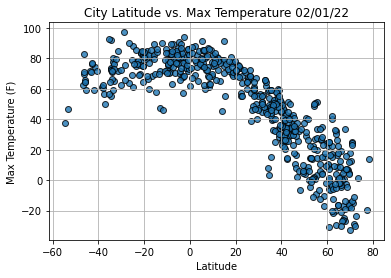

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

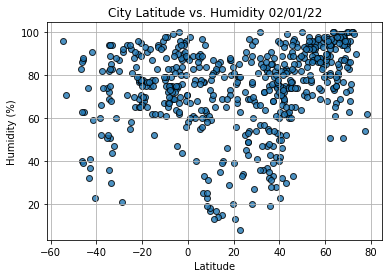

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

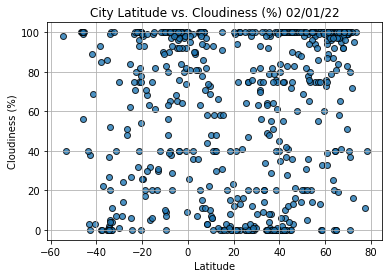

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

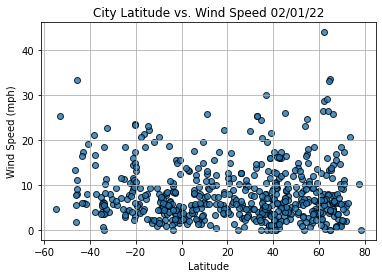

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

# Create a linear regression function

In [35]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [36]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

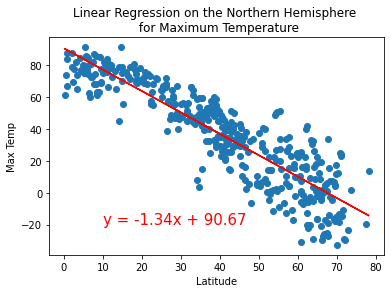

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,-20))

In [38]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(r_value)

-0.8911204943740832


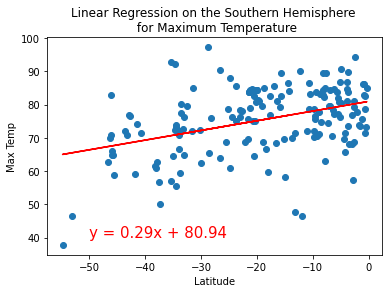

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,40))

In [40]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(r_value)

0.40189246896459097


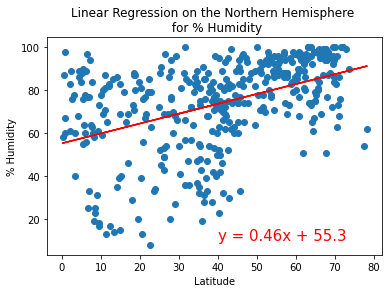

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

In [42]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(r_value)

0.44462957609943227


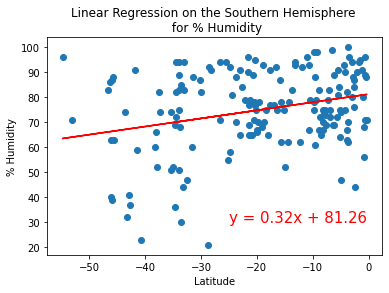

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-25,30))

In [47]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(r_value)

0.2811735798388156


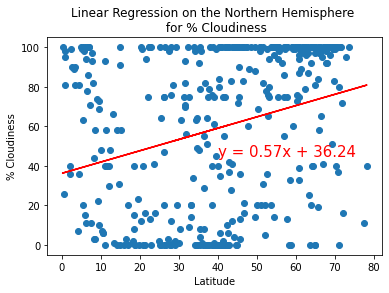

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,45))

In [51]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(r_value)

0.290069596038172


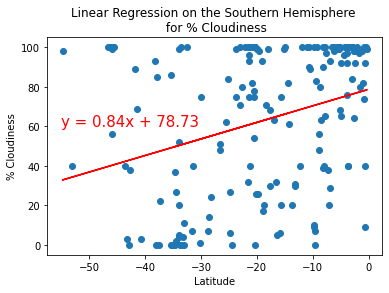

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-55,60))

In [56]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(r_value)

0.31179749727673


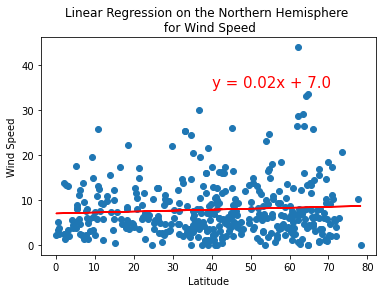

In [57]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

In [58]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(r_value)

0.06743482038838379


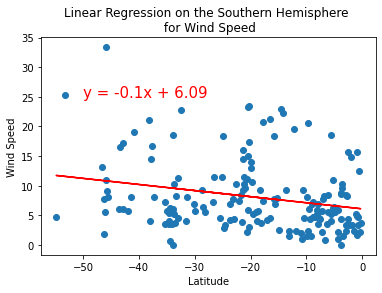

In [60]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,25))

In [61]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(r_value)

-0.24006732267104997
